In [83]:
import pandas as pd



In [84]:
df=pd.read_excel("premiums_young.xlsx")
df

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
3,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
4,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603
24694,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498
24695,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
24696,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564


In [85]:
df.shape


(24698, 13)

In [86]:
df.columns.str.replace(' ','_').str.lower
df.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [87]:
df.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [88]:
df.columns.str.replace('Number Of Dependants','No_of_dependents')

Index(['Age', 'Gender', 'Region', 'Marital_status', 'No_of_dependents',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [89]:
df.columns.str.replace('Medical History','Medical_history')

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical_history', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [90]:
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
3,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
4,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050


Handling N/A Values

In [91]:
df.isnull().sum()




Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           3
Employment_Status        1
Income_Level             6
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [92]:
df.dropna(inplace=True)


In [93]:
df.shape

(24689, 13)

In [94]:
df.isnull().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [95]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [96]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,24689.000000,24689.000000,24689.000000,24689.000000
mean,22.711612,1.022399,22.488477,9947.432460
std,3.334971,1.239221,23.166352,5091.349219
min,18.000000,-3.000000,1.000000,3501.000000
25%,20.000000,0.000000,7.000000,6521.000000
50%,22.000000,1.000000,16.000000,8648.000000
75%,25.000000,2.000000,31.000000,11809.000000
max,30.000000,5.000000,790.000000,33489.000000


outliers in no.of dependencies

In [97]:
a=df[df['Number Of Dependants']<0]
a.shape



(29, 13)

In [98]:
df['Number Of Dependants']=abs(df['Number Of Dependants'])

In [99]:
b=df[df['Number Of Dependants']<0]
b.shape

(0, 13)

In [100]:
df['Number Of Dependants'].describe()

count    24689.000000
mean         1.027340
std          1.235128
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: Number Of Dependants, dtype: float64

In [101]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,24689.000000,24689.000000,24689.000000,24689.000000
mean,22.711612,1.027340,22.488477,9947.432460
std,3.334971,1.235128,23.166352,5091.349219
min,18.000000,0.000000,1.000000,3501.000000
25%,20.000000,0.000000,7.000000,6521.000000
50%,22.000000,1.000000,16.000000,8648.000000
75%,25.000000,2.000000,31.000000,11809.000000
max,30.000000,5.000000,790.000000,33489.000000


In [102]:
numeric_columns=df.select_dtypes(['Float64','Int64']).columns
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt



In [104]:
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

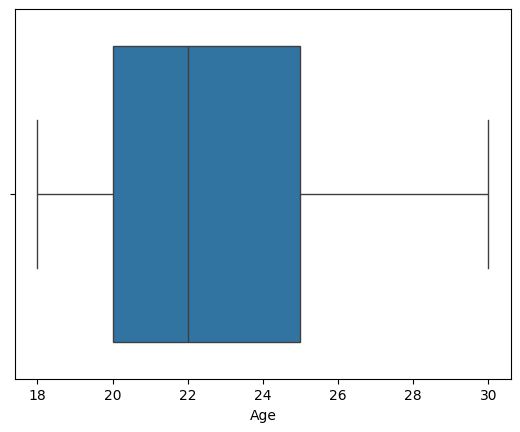

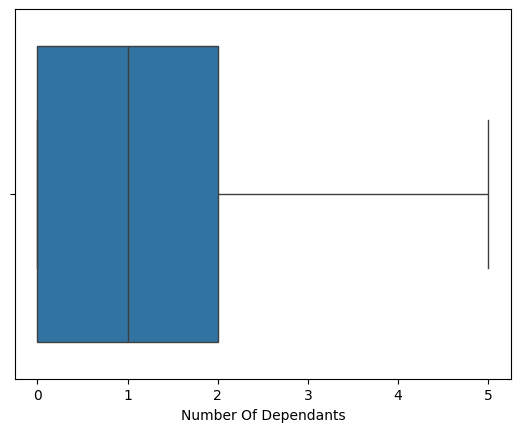

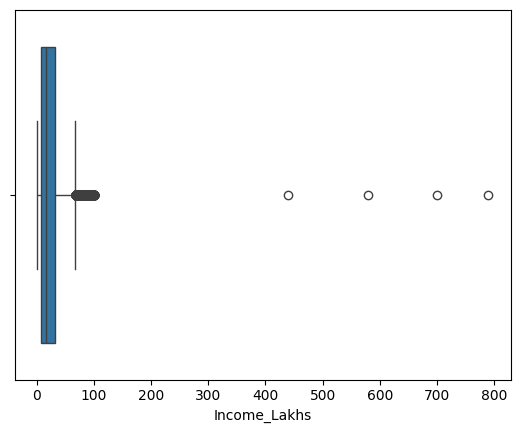

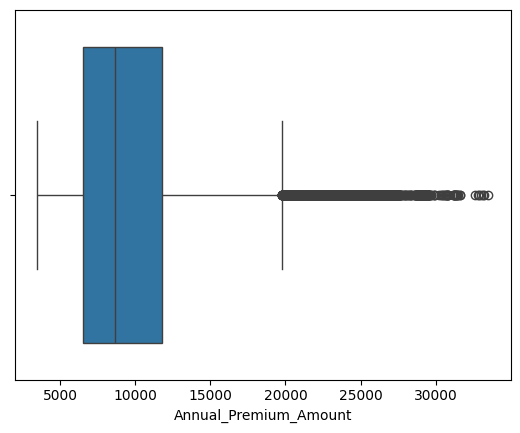

In [105]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [106]:
df[df.Age>100]['Age'].unique()

array([], dtype=int64)

In [107]:
df1=df[df.Age<100].copy()


In [108]:
df1.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,24689.000000,24689.000000,24689.000000,24689.000000
mean,22.711612,1.027340,22.488477,9947.432460
std,3.334971,1.235128,23.166352,5091.349219
min,18.000000,0.000000,1.000000,3501.000000
25%,20.000000,0.000000,7.000000,6521.000000
50%,22.000000,1.000000,16.000000,8648.000000
75%,25.000000,2.000000,31.000000,11809.000000
max,30.000000,5.000000,790.000000,33489.000000


In [109]:
quantile_threshold=df1.Income_Lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [110]:
df2=df1[df1.Income_Lakhs<=quantile_threshold].copy()


In [111]:
df2.Income_Lakhs.describe()

count    24685.00000
mean        22.39044
std         21.78630
min          1.00000
25%          7.00000
50%         16.00000
75%         31.00000
max        100.00000
Name: Income_Lakhs, dtype: float64

In [112]:
df2.shape

(24685, 13)

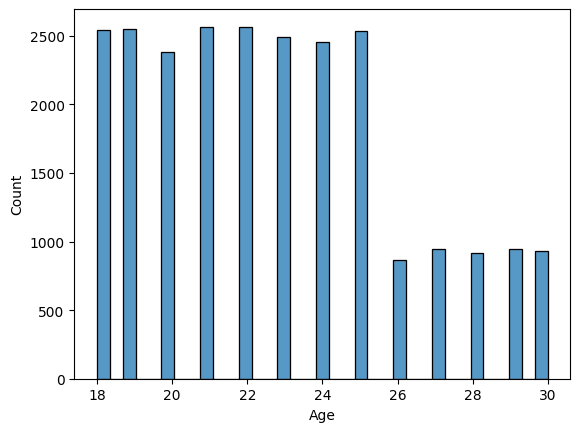

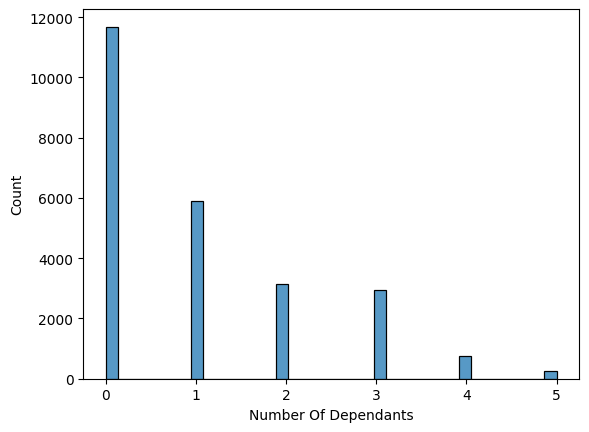

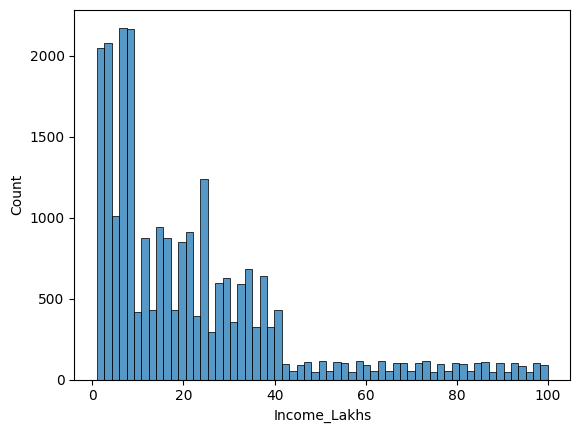

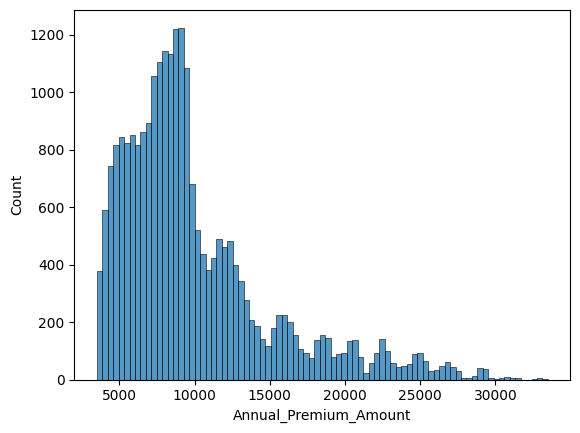

In [113]:
for col in numeric_columns:
    sns.histplot(df2[col])
    plt.show()

In [114]:
df2.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


<Axes: xlabel='Age', ylabel='Annual_Premium_Amount'>

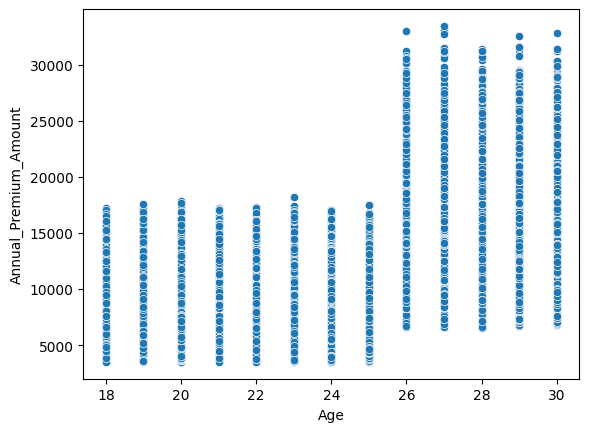

In [115]:
sns.scatterplot(df2,x='Age',y='Annual_Premium_Amount')

In [116]:
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

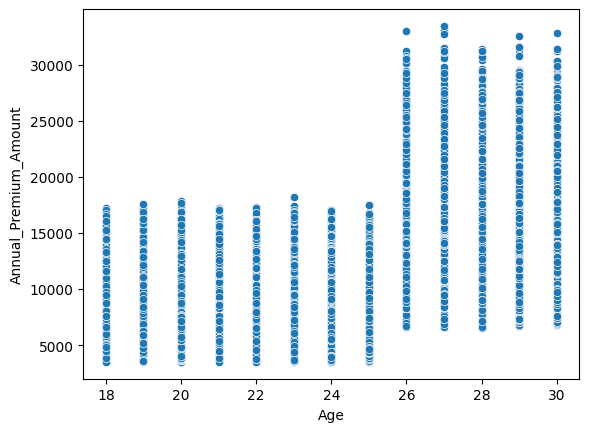

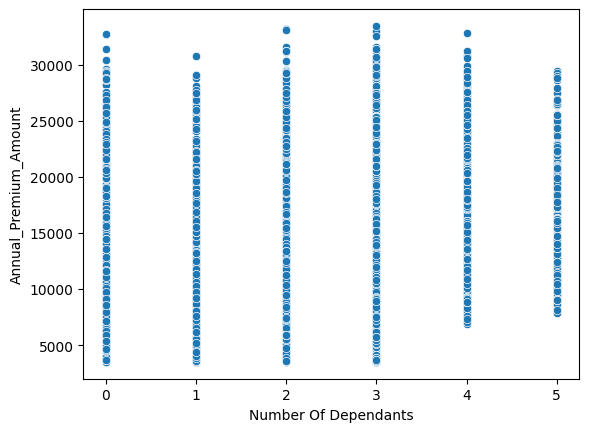

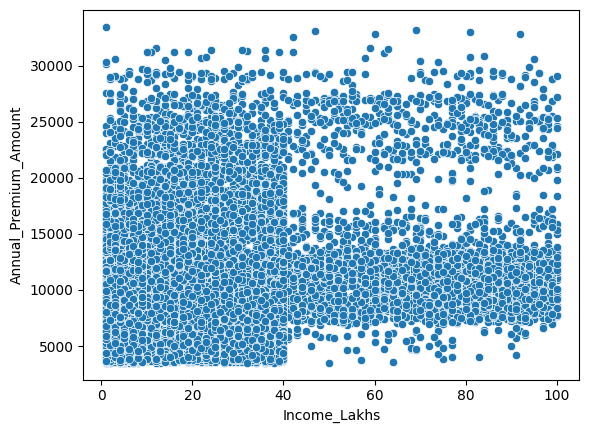

In [117]:

numeric_features=['Age', 'Number Of Dependants', 'Income_Lakhs']
for col in numeric_features:
    sns.scatterplot(df2,x=col,y=df2['Annual_Premium_Amount'])
    plt.show()


In [118]:
df2.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
3,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
4,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050


In [119]:
df2.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [120]:
categorial_columns=['Gender','Region','Marital_status','BMI_Category','Smoking_Status','Employment_Status','Income_Level','Medical History','Insurance_Plan']
for col in categorial_columns:
    print(col,": ",df2[col].unique())

Gender :  ['Male' 'Female']
Region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status :  ['Unmarried' 'Married']
BMI_Category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status :  ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
Employment_Status :  ['Salaried' 'Self-Employed' 'Freelancer']
Income_Level :  ['<10L' '> 40L' '10L - 25L' '25L - 40L']
Medical History :  ['Diabetes' 'No Disease' 'High blood pressure' 'Heart disease'
 'Diabetes & High blood pressure' 'High blood pressure & Heart disease'
 'Diabetes & Thyroid' 'Diabetes & Heart disease' 'Thyroid']
Insurance_Plan :  ['Bronze' 'Gold' 'Silver']


In [121]:
df2['Smoking_Status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
    
},inplace=True)

/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_51162/3055924117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Smoking_Status'].replace({


In [122]:
categorial_columns=['Gender','Region','Marital_status','BMI_Category','Smoking_Status','Employment_Status','Income_Level','Medical History','Insurance_Plan']
for col in categorial_columns:
    print(col,": ",df2[col].unique())

Gender :  ['Male' 'Female']
Region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status :  ['Unmarried' 'Married']
BMI_Category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status :  ['No Smoking' 'Regular' 'Occasional']
Employment_Status :  ['Salaried' 'Self-Employed' 'Freelancer']
Income_Level :  ['<10L' '> 40L' '10L - 25L' '25L - 40L']
Medical History :  ['Diabetes' 'No Disease' 'High blood pressure' 'Heart disease'
 'Diabetes & High blood pressure' 'High blood pressure & Heart disease'
 'Diabetes & Thyroid' 'Diabetes & Heart disease' 'Thyroid']
Insurance_Plan :  ['Bronze' 'Gold' 'Silver']


In [123]:
pct_count=df2['Gender'].value_counts(normalize=True)


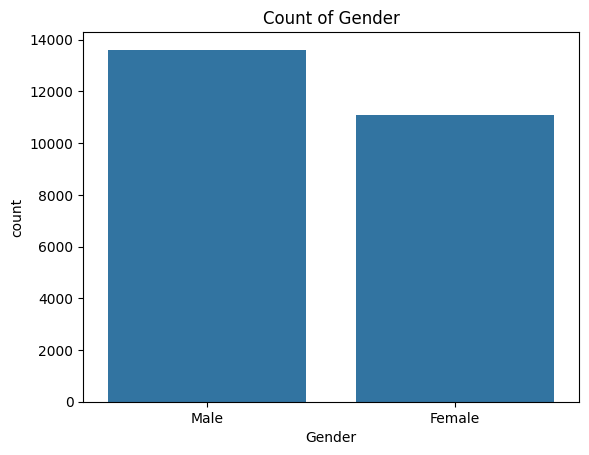

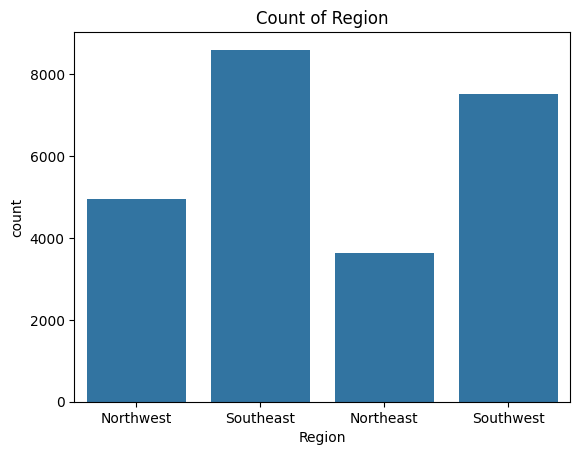

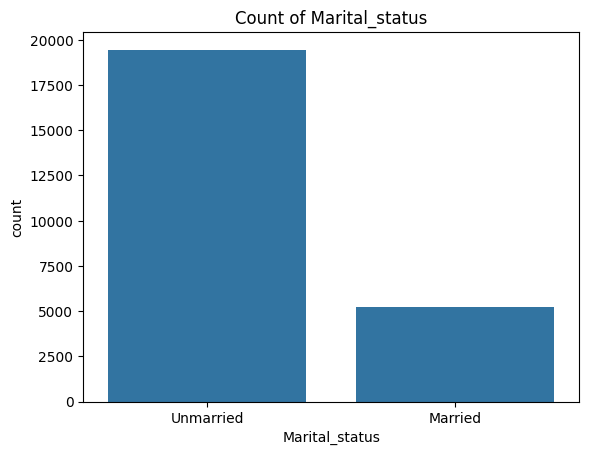

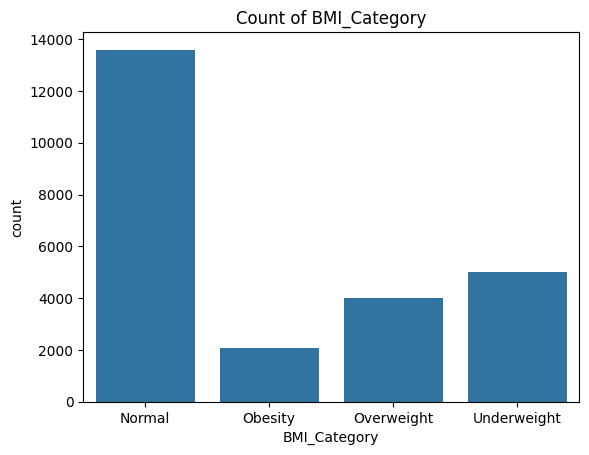

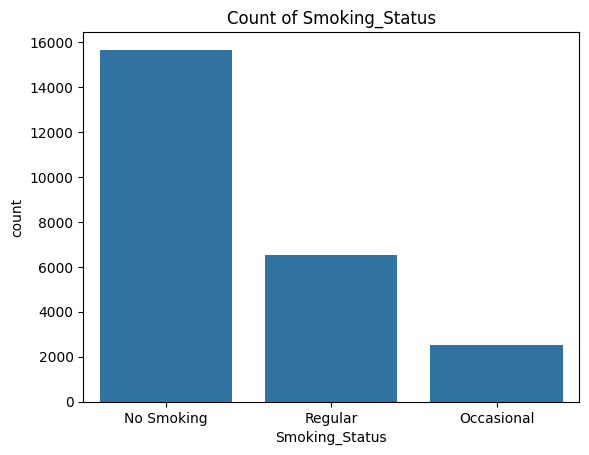

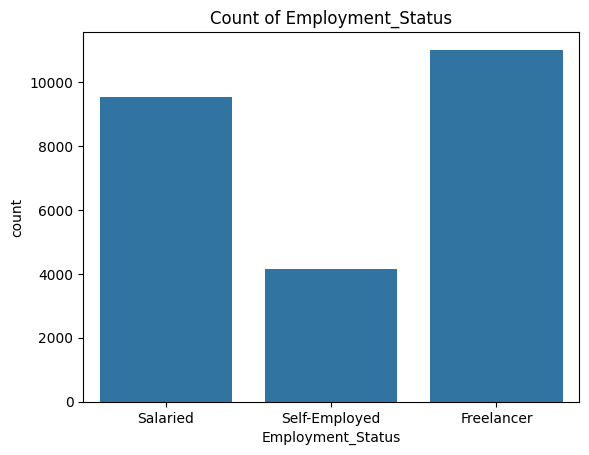

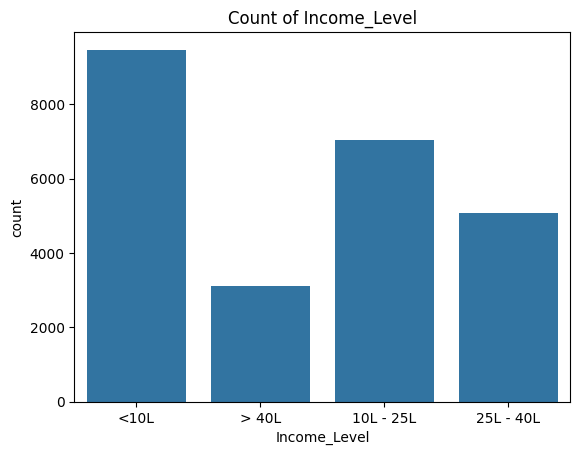

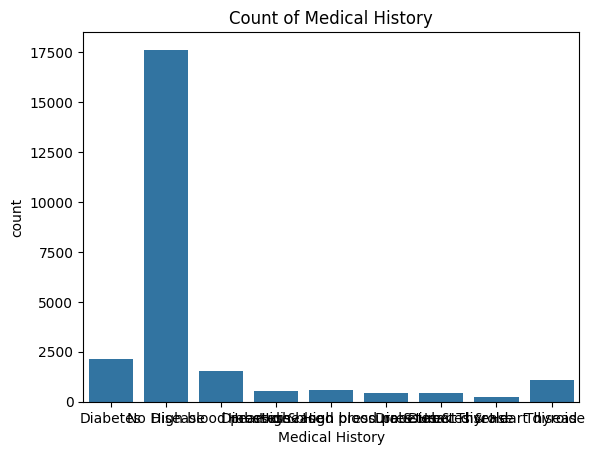

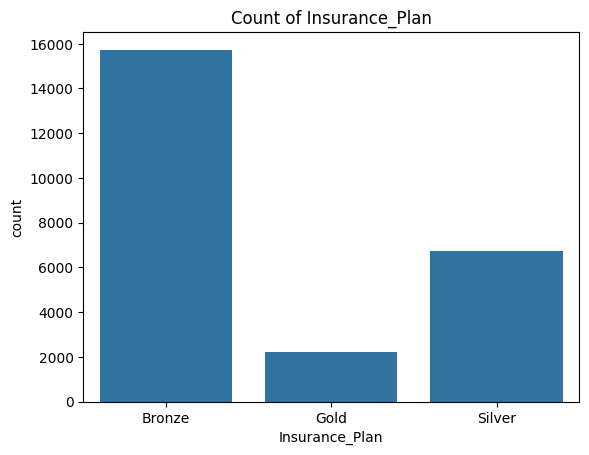

In [124]:
for i in categorial_columns:
    sns.countplot(data=df2, x=i)
    plt.title(f"Count of {i}")
    plt.show()



FEATURE ENGINEERING

In [125]:
df2.sample(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
23169,23,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,7,No Disease,Bronze,6867


In [126]:
df2['Medical History'].unique()

array(['Diabetes', 'No Disease', 'High blood pressure', 'Heart disease',
       'Diabetes & High blood pressure',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease', 'Thyroid'], dtype=object)

In [127]:
risk_score={
    'diabetes': 6,
    'heart disease' : 8,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [128]:
df2[['disease1','disease2']]=df2['Medical History'].str.split("&",expand=True).apply(lambda x:x.str.lower())

In [129]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)
df2['total_risk_score']=0


for disease in ['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_score)


max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_score']= (df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head(5)

/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_51162/1908823310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none',inplace=True)
/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_51162/1908823310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6.0,0.75
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6.0,0.75
2,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0.0,0.00
3,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,NaN,NaN
4,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0.0,0.00


In [130]:
df2

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6.0,0.75
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6.0,0.75
2,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0.0,0.00
3,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,NaN,NaN
4,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603,no disease,none,0.0,0.00
24694,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498,diabetes,none,6.0,0.75
24695,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,no disease,none,0.0,0.00
24696,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,no disease,none,0.0,0.00


In [131]:
df2['total_risk_score'].fillna('0.0',inplace=True)

/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_51162/939485161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_risk_score'].fillna('0.0',inplace=True)
/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_51162/939485161.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2['total_risk_score'].fillna('0.0',inplace=Tru

In [132]:
df2.sample(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
8563,24,Male,Southeast,Unmarried,0,Underweight,Regular,Freelancer,<10L,4,No Disease,Bronze,8652,no disease,none,0.0,0.0
5139,21,Male,Northwest,Unmarried,0,Normal,Occasional,Freelancer,25L - 40L,26,No Disease,Bronze,5801,no disease,none,0.0,0.0
15590,23,Male,Northeast,Married,3,Underweight,No Smoking,Freelancer,10L - 25L,20,No Disease,Bronze,7850,no disease,none,0.0,0.0
1015,20,Male,Northeast,Unmarried,1,Overweight,No Smoking,Self-Employed,> 40L,44,No Disease,Silver,11629,no disease,none,0.0,0.0
1552,25,Male,Southeast,Unmarried,0,Underweight,No Smoking,Salaried,> 40L,98,No Disease,Silver,12268,no disease,none,0.0,0.0


In [133]:
df2['Insurance_Plan']=df2['Insurance_Plan'].map({'Bronze':1,'Silver': 2,'Gold':3})

In [134]:
df2

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,diabetes,none,6.0,0.75
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,diabetes,none,6.0,0.75
2,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,no disease,none,0.0,0.00
3,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,high blood pressure,none,0.0,NaN
4,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,no disease,none,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,3,11603,no disease,none,0.0,0.00
24694,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,3,14498,diabetes,none,6.0,0.75
24695,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,1,9111,no disease,none,0.0,0.00
24696,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,1,8564,no disease,none,0.0,0.00


In [135]:
df2['Income_Level']=df2['Income_Level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})

In [136]:
df2.sample(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
9247,29,Male,Northeast,Unmarried,1,Normal,Regular,Salaried,1,3,Diabetes,1,12347,diabetes,none,6.0,0.75
24387,19,Male,Southwest,Unmarried,0,Normal,Regular,Salaried,4,95,No Disease,2,13431,no disease,none,0.0,0.00
17843,18,Male,Southeast,Unmarried,0,Overweight,No Smoking,Salaried,1,4,No Disease,1,6638,no disease,none,0.0,0.00
21453,19,Female,Northwest,Unmarried,1,Obesity,Occasional,Freelancer,2,19,No Disease,1,6859,no disease,none,0.0,0.00
19527,25,Male,Southwest,Unmarried,0,Normal,Regular,Salaried,2,21,No Disease,1,5588,no disease,none,0.0,0.00


In [137]:
nominal_columns=['Gender','Region','Marital_status','BMI_Category','Smoking_Status','Employment_Status']
df3=pd.get_dummies(df2,columns=nominal_columns,dtype=int,drop_first=True)

In [138]:
df3.sample(5)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,...,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
5224,21,0,2,16,No Disease,1,4979,no disease,none,0.0,...,0,0,1,0,0,0,0,0,1,0
19843,27,3,4,96,Diabetes,3,29370,diabetes,none,6.0,...,0,0,0,1,0,0,0,1,1,0
18476,25,1,3,38,No Disease,1,8960,no disease,none,0.0,...,0,1,1,0,0,0,0,1,0,0
17159,19,0,3,40,No Disease,1,9627,no disease,none,0.0,...,0,1,1,0,0,0,0,1,1,0
7614,23,0,3,30,No Disease,1,4983,no disease,none,0.0,...,0,1,1,0,0,0,0,0,0,0


In [139]:
#deleting of unnecessary columns from the data set which doesnt inpact in the model training
df4=df3.drop(['Medical History','disease1','disease2','total_risk_score'],axis=1)


In [140]:
df4

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0.75,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.75,0,0,1,0,0,1,0,0,0,1,1,0
2,30,3,4,77,3,20303,0.00,0,0,1,0,0,0,0,0,0,0,1,0
3,18,0,4,99,2,13365,NaN,1,0,0,0,1,0,1,0,0,1,0,1
4,22,0,1,3,2,11050,0.00,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,18,0,4,91,3,11603,0.00,0,0,1,0,1,0,0,1,0,0,0,0
24694,23,0,4,57,3,14498,0.75,0,1,0,0,1,1,0,0,1,0,0,0
24695,24,0,3,35,1,9111,0.00,0,1,0,0,1,0,0,1,0,0,0,1
24696,21,0,3,32,1,8564,0.00,1,1,0,0,1,0,0,0,0,1,0,0


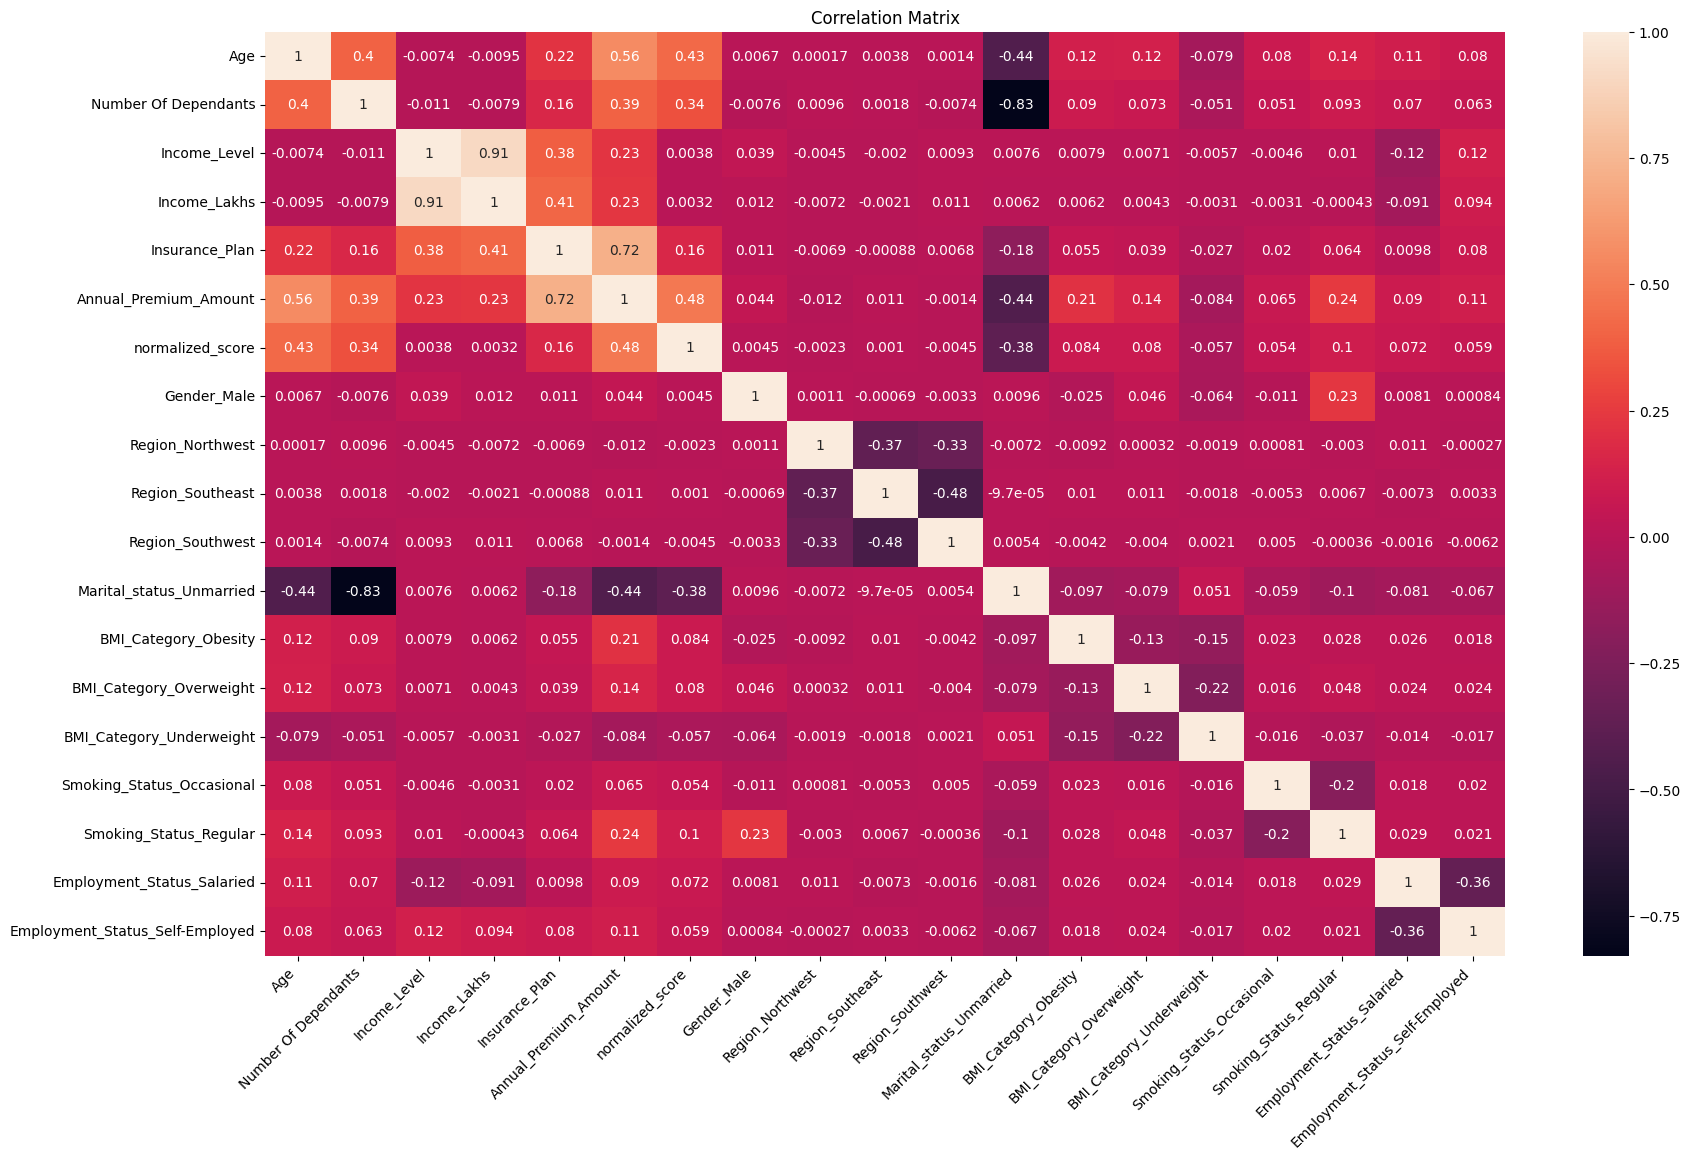

In [141]:
cm = df4.corr()

plt.figure(figsize=(20, 12))  
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout
plt.show()

In [142]:
df4.sample(5)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
6416,20,1,4,74,1,7168,0.000,1,0,0,0,1,0,0,1,0,0,0,0
3238,21,3,4,61,2,9921,0.625,0,0,1,0,0,0,0,0,0,0,1,0
22238,22,0,1,4,1,4765,NaN,1,0,0,1,1,0,0,0,1,0,0,0
501,21,1,4,66,2,9410,0.000,1,1,0,0,1,0,0,1,0,1,0,0
14535,28,1,3,30,2,16154,NaN,1,1,0,0,1,0,0,1,0,0,1,0


In [143]:
df4 #final dataframe

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0.75,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.75,0,0,1,0,0,1,0,0,0,1,1,0
2,30,3,4,77,3,20303,0.00,0,0,1,0,0,0,0,0,0,0,1,0
3,18,0,4,99,2,13365,NaN,1,0,0,0,1,0,1,0,0,1,0,1
4,22,0,1,3,2,11050,0.00,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,18,0,4,91,3,11603,0.00,0,0,1,0,1,0,0,1,0,0,0,0
24694,23,0,4,57,3,14498,0.75,0,1,0,0,1,1,0,0,1,0,0,0
24695,24,0,3,35,1,9111,0.00,0,1,0,0,1,0,0,1,0,0,0,1
24696,21,0,3,32,1,8564,0.00,1,1,0,0,1,0,0,0,0,1,0,0


In [144]:
X=df4.drop('Annual_Premium_Amount',axis=1)
y=df4['Annual_Premium_Amount']


In [145]:
df4.head(1)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0.75,1,1,0,0,1,0,0,0,0,0,1,0


In [146]:
#scaling the large values 


from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['Age','Number Of Dependants','Income_Level','Income_Lakhs']
scalar=MinMaxScaler()



X[cols_to_scale]=scalar.fit_transform(X[cols_to_scale])

In [147]:
X.head(2)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,0.666667,0.0,0.0,0.050505,1,0.75,1,1,0,0,1,0,0,0,0,0,1,0
1,0.916667,0.4,0.0,0.050505,1,0.75,0,0,1,0,0,1,0,0,0,1,1,0


In [148]:
X.describe()

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
count,24685.000000,24685.000000,24685.000000,24685.000000,24685.000000,21428.000000,24685.000000,24685.000000,24685.000000,24685.000000,24685.000000,24685.000000,24685.000000,24685.000000,24685.000000,24685.000000,24685.00000,24685.000000
mean,0.392657,0.205501,0.357748,0.216065,1.452623,0.133272,0.551306,0.201013,0.348228,0.304112,0.788211,0.084505,0.161799,0.203038,0.102694,0.263196,0.38574,0.168280
std,0.277930,0.247032,0.347493,0.220064,0.654127,0.290808,0.497371,0.400766,0.476418,0.460040,0.408584,0.278149,0.368273,0.402269,0.303565,0.440377,0.48678,0.374123
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.166667,0.000000,0.000000,0.060606,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.333333,0.200000,0.333333,0.151515,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.583333,0.400000,0.666667,0.303030,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [149]:
X_modified=X.drop('Income_Level',axis=1)

In [150]:
X_modified.head(5)

,Age,Number Of Dependants,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,0.666667,0.0,0.050505,1,0.75,1,1,0,0,1,0,0,0,0,0,1,0
1,0.916667,0.4,0.050505,1,0.75,0,0,1,0,0,1,0,0,0,1,1,0
2,1.000000,0.6,0.767677,3,0.00,0,0,1,0,0,0,0,0,0,0,1,0
3,0.000000,0.0,0.989899,2,NaN,1,0,0,0,1,0,1,0,0,1,0,1
4,0.333333,0.0,0.020202,2,0.00,0,1,0,0,1,0,0,1,0,0,0,0


In [151]:
#model training data
X_modified
y

0         9053
1        16339
2        20303
3        13365
4        11050
         ...  
24693    11603
24694    14498
24695     9111
24696     8564
24697     9490
Name: Annual_Premium_Amount, Length: 24685, dtype: int64

MODEL TRAINING

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [153]:
X_train,X_test,y_train,y_test=train_test_split(X_modified,y,test_size=0.3,random_state=33)


In [154]:
print("x_train : ",X_train.shape)
print("x_test : ",X_test.shape)
print("y_test : ",y_test.shape)
print("y_train : ",y_train.shape)

x_train :  (17279, 17)
x_test :  (7406, 17)
y_test :  (7406,)
y_train :  (17279,)


In [155]:
X_test.isnull().sum()



Age                                   0
Number Of Dependants                  0
Income_Lakhs                          0
Insurance_Plan                        0
normalized_score                   1018
Gender_Male                           0
Region_Northwest                      0
Region_Southeast                      0
Region_Southwest                      0
Marital_status_Unmarried              0
BMI_Category_Obesity                  0
BMI_Category_Overweight               0
BMI_Category_Underweight              0
Smoking_Status_Occasional             0
Smoking_Status_Regular                0
Employment_Status_Salaried            0
Employment_Status_Self-Employed       0
dtype: int64

In [156]:
X_train = X_train.fillna(0.000)
X_test = X_test.fillna(0.000) 

In [157]:
X_test.isnull().sum()

Age                                0
Number Of Dependants               0
Income_Lakhs                       0
Insurance_Plan                     0
normalized_score                   0
Gender_Male                        0
Region_Northwest                   0
Region_Southeast                   0
Region_Southwest                   0
Marital_status_Unmarried           0
BMI_Category_Obesity               0
BMI_Category_Overweight            0
BMI_Category_Underweight           0
Smoking_Status_Occasional          0
Smoking_Status_Regular             0
Employment_Status_Salaried         0
Employment_Status_Self-Employed    0
dtype: int64

In [158]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [159]:
X_train.isna().sum()


Age                                0
Number Of Dependants               0
Income_Lakhs                       0
Insurance_Plan                     0
normalized_score                   0
Gender_Male                        0
Region_Northwest                   0
Region_Southeast                   0
Region_Southwest                   0
Marital_status_Unmarried           0
BMI_Category_Obesity               0
BMI_Category_Overweight            0
BMI_Category_Underweight           0
Smoking_Status_Occasional          0
Smoking_Status_Regular             0
Employment_Status_Salaried         0
Employment_Status_Self-Employed    0
dtype: int64

In [160]:
#linear regression

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
training_score=model_lr.score(X_train,y_train)
testing_score=model_lr.score(X_test,y_test)
print(training_score,testing_score)


0.771406733899383 0.7581382627410429


In [161]:
X_test.columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Insurance_Plan',
       'normalized_score', 'Gender_Male', 'Region_Northwest',
       'Region_Southeast', 'Region_Southwest', 'Marital_status_Unmarried',
       'BMI_Category_Obesity', 'BMI_Category_Overweight',
       'BMI_Category_Underweight', 'Smoking_Status_Occasional',
       'Smoking_Status_Regular', 'Employment_Status_Salaried',
       'Employment_Status_Self-Employed'],
      dtype='object')

In [162]:
model_lr.coef_

array([ 5.14604827e+03,  5.78523242e+02, -1.54634369e+02,  4.67988635e+03,
        2.12799541e+03,  5.37017687e+01, -1.04774704e+02,  3.04453488e+00,
       -7.35042572e+01, -1.40933001e+03,  2.38971157e+03,  1.03180475e+03,
        1.54913375e+02,  7.49295631e+02,  1.65501884e+03,  4.45266563e+02,
        4.61999279e+02])

In [163]:
model_lr.intercept_

np.float64(765.5693116961247)

In [164]:
feature_importance=model_lr.coef_
coeff_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['coefficents'])
sorted_coeff_df=coeff_df.sort_values(by='coefficents',ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

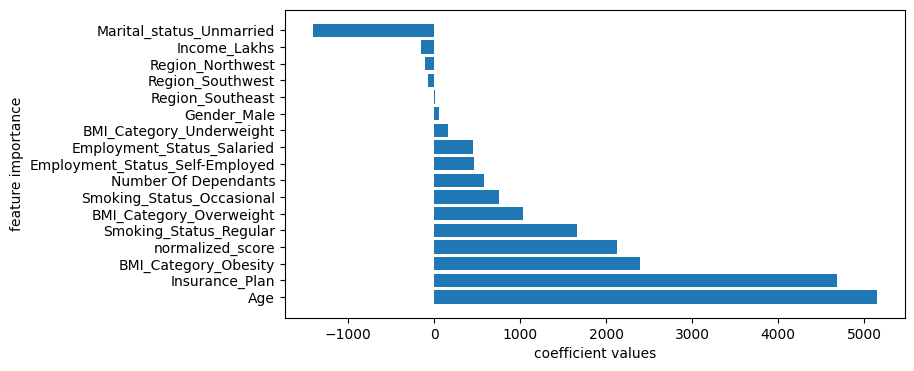

In [165]:
plt.figure(figsize=(8, 4))
plt.barh(sorted_coeff_df.index,sorted_coeff_df['coefficents'])
plt.xlabel('coefficient values')
plt.ylabel('feature importance')
plt.show

In [166]:
#ridge regression
from sklearn.linear_model import Ridge
model_ridge=Ridge()
model_ridge.fit(X_train,y_train)
training_score=model_ridge.score(X_train,y_train)
testing_score=model_ridge.score(X_test,y_test)
training_score,testing_score

(0.771406676254695, 0.7581446498880207)

In [167]:
!pip uninstall xgboost -y
!pip install xgboost --no-cache-dir




Found existing installation: xgboost 3.1.0
Uninstalling xgboost-3.1.0:
  Successfully uninstalled xgboost-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.9 MB/s eta 0:00:00a 0:00:01


In [168]:
#xgboost

from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
training_score=model_ridge.score(X_train,y_train)
testing_score=model_ridge.score(X_test,y_test)
training_score,testing_score


(0.771406676254695, 0.7581446498880207)

In [169]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define model
model_xgb = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [20, 40, 50],        # ✅ correct name: n_estimators
    'learning_rate': [0.01, 0.1, 0.2],   # ✅ correct name: learning_rate
    'max_depth': [3, 4, 5]
}

# Define Randomized Search
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_grid,
    n_iter=10,            # number of random combinations to try
    scoring='r2',        # metric to evaluate
    cv=3,                # 3-fold cross-validation
    verbose=2,
    random_state=42,
            
)

# Fit on training data
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.2, max_depth=4, n_e

In [170]:
best_model=random_search.best_estimator_
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


<function matplotlib.pyplot.show(close=None, block=None)>

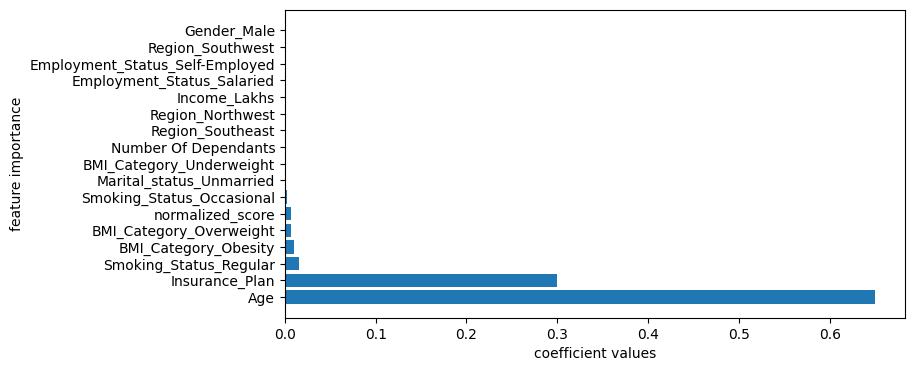

In [171]:
feature_importance=best_model.feature_importances_


coeff_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['coefficents'])
sorted_coeff_df=coeff_df.sort_values(by='coefficents',ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(sorted_coeff_df.index,sorted_coeff_df['coefficents'])
plt.xlabel('coefficient values')
plt.ylabel('feature importance')
plt.show

#ERROR ANALYSIS

In [172]:
y_pred=best_model.predict(X_test)
residuals=y_pred-y_test
residuals_pct=residuals*100/y_test
result_df=pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred,
    'residuals ' : residuals,
    'residuals_pct' : residuals_pct

})
